In [1]:
%pip install geopandas matplotlib

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 7.3 MB/s eta 0:00:00m eta 0:00:010:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.4/16.4 MB 12.2 MB/s eta 0:00:00m eta 0:00:010:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.0/8.0 MB 12.1 MB/s eta 0:00:00m eta 0:00:010:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.3/2.3 MB 11.5 MB/s eta 0:00:00 MB/s eta 0:00:01:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 97.9/97.9 kB 8.0 MB/s eta 0:00:00

[notice] A new release of pip available: 22.3.1 -> 23.2.1
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


Instalação das LIBs necessárias para o projeto

In [2]:
import geopandas as gpd
import matplotlib

In [10]:
path_list = ['BR_Municipios_2022/BR_Municipios_2022.shp', 'BR_Rodovias_2022/Rodovias_estaduais_sre.shp', 'BR_Aeroportos_2022/AEROPORTOS.shp']
dados = [gpd.read_file(path) for path in path_list]

In [13]:
municipios_filter = dados[0][dados[0]['SIGLA_UF'] == 'PR']

In [14]:
municipios_filter

,CD_MUN,NM_MUN,SIGLA_UF,AREA_KM2,geometry
3912,4100103,Abatiá,PR,228.717,"POLYGON ((-50.31709 -23.35594, -50.32010 -23.3..."
3913,4100202,Adrianópolis,PR,1349.311,"POLYGON ((-48.74044 -24.86835, -48.83801 -24.8..."
3914,4100301,Agudos do Sul,PR,192.261,"POLYGON ((-49.29618 -26.08673, -49.29620 -26.0..."
3915,4100400,Almirante Tamandaré,PR,194.228,"POLYGON ((-49.25401 -25.31913, -49.25402 -25.3..."
3916,4100459,Altamira do Paraná,PR,386.945,"POLYGON ((-52.71774 -24.85776, -52.71840 -24.8..."
...,...,...,...,...,...
4306,4128625,Alto Paraíso,PR,967.772,"POLYGON ((-53.94556 -23.64963, -53.95576 -23.6..."
4307,4128633,Doutor Ulysses,PR,777.482,"POLYGON ((-49.34065 -24.75685, -49.34082 -24.7..."
4308,4128658,Virmond,PR,249.094,"POLYGON ((-52.16911 -25.38702, -52.16953 -25.3..."
4309,4128708,Vitorino,PR,308.218,"POLYGON ((-52.77092 -26.24167, -52.77001 -26.2..."


<Axes: >

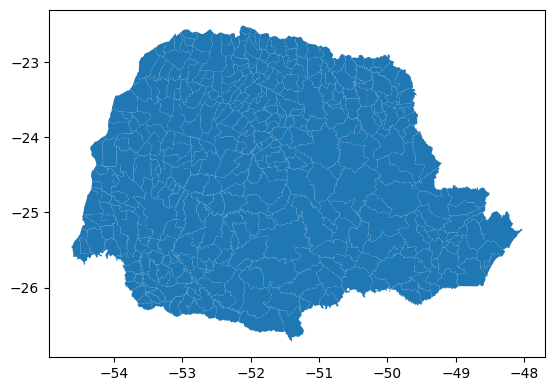

In [15]:
municipios_filter.plot()

In [ ]:
rodovias = gpd.overlay(dados[1], municipios_filter, how='intersection')